In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 26EE-3E1E

 Directory of C:\Users\kashyap\Desktop\data\arab

09/19/2020  04:08 AM    <DIR>          .
09/19/2020  04:08 AM    <DIR>          ..
09/19/2020  03:49 AM    <DIR>          .ipynb_checkpoints
09/18/2020  12:34 PM        11,941,568 Apr.xlsx
09/18/2020  12:06 AM         6,411,168 Apr_Working.xlsb
09/18/2020  08:49 PM            43,548 data.ipynb
09/19/2020  12:42 AM           118,253 data-Copy1.ipynb
09/19/2020  04:07 AM            10,771 Final.ipynb
09/18/2020  12:35 PM         9,851,777 jun.xlsx
09/17/2020  11:54 PM         5,742,576 Jun_Working.xlsb
09/18/2020  12:36 PM        12,244,503 mar.xlsx
09/17/2020  11:53 PM         6,457,142 Mar_Working.xlsb
09/18/2020  12:37 PM        10,629,783 may.xlsx
09/17/2020  11:54 PM         5,982,398 May_Working.xlsb
09/19/2020  04:08 AM        43,887,117 model with data.zip
09/19/2020  03:43 AM             1,164 model.pkl
              13 File(s)    113,321,768 bytes
             

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import datetime
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
import joblib
import plotly.plotly as po
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


pd.options.display.max_rows = 100
pd.options.display.max_columns = 999
plt.style.use('ggplot')

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 26EE-3E1E

 Directory of C:\Users\kashyap\Desktop\data\arab

09/19/2020  04:08 AM    <DIR>          .
09/19/2020  04:08 AM    <DIR>          ..
09/19/2020  03:49 AM    <DIR>          .ipynb_checkpoints
09/18/2020  12:34 PM        11,941,568 Apr.xlsx
09/18/2020  12:06 AM         6,411,168 Apr_Working.xlsb
09/18/2020  08:49 PM            43,548 data.ipynb
09/19/2020  12:42 AM           118,253 data-Copy1.ipynb
09/19/2020  04:07 AM            10,771 Final.ipynb
09/18/2020  12:35 PM         9,851,777 jun.xlsx
09/17/2020  11:54 PM         5,742,576 Jun_Working.xlsb
09/18/2020  12:36 PM        12,244,503 mar.xlsx
09/17/2020  11:53 PM         6,457,142 Mar_Working.xlsb
09/18/2020  12:37 PM        10,629,783 may.xlsx
09/17/2020  11:54 PM         5,982,398 May_Working.xlsb
09/19/2020  04:08 AM        43,887,117 model with data.zip
09/19/2020  03:43 AM             1,164 model.pkl
              13 File(s)    113,321,768 bytes
             

In [4]:
# Reading the files
df1 = pd.read_excel("mar.xlsx")
df2 = pd.read_excel("apr.xlsx")
df3 = pd.read_excel("may.xlsx")
df4 = pd.read_excel("may.xlsx")

In [5]:
# concatinating different files to create one
df = pd.concat([df1,df2,df3, df4], axis = 0)

In [6]:
df.head()

,FACILITY,LOCATION_NAME,MRN,FIN,GENDER,AGE,NATIONALITY_IDENTIFIER,FIN_CLASS,APPT_TYPE,ENCT_TYPE,TYPE_NAME,APPT_CLASS,BOOKING_DT_TM,APPT_DATE_TIME,REG_DT_TM,APPT_STATUS,BOOKING_PRSNL,RESOURCE_NAME,SEEN_BY_PHYSICIAN,SEEN_BY_GD,SEEN_BY_PHYSICIAN_ID,SPECIALTY,SUB_SPECIALTY,Gender Group,Age Group,Nat Group,Fin Group,Appt Class Group,Appt Hour,Appt Day,Appt Month,Appt Wait (Days),Appt Wait (Range),User Group,No Show,Category
0,TW Fertility,TW Fertility Clinic-Ambulatory(s),TW00-021-760,007-729-629,Female,37,NATIONAL,Daman Thiqa,TW US Follicular Monitoring,Radiology Exam,APPOINTMENT,-,2019-03-10 10:09:00,2019-03-14 08:45:00,2019-03-14 09:28:00,CHECKED IN,"Alameri , Huda Slayem",TW IVF US ROOM 1,-,-,-,RADIOLOGY,ULTRASOUND,Female,Adult,National,Thiqa,Unknown,8,Thursday,March,3.941667,In 2 Weeks,BE User,Seen,No Show History
1,TW Fertility,TW Fertility Clinic-Ambulatory(s),TW00-021-760,007-733-591,Female,37,NATIONAL,Daman Thiqa,TW US Follicular Monitoring,Radiology Exam,APPOINTMENT,-,2019-03-14 10:51:00,2019-03-17 08:45:00,2019-03-17 09:28:00,CHECKED IN,"Alameri , Huda Slayem",TW IVF US ROOM 1,-,-,-,RADIOLOGY,ULTRASOUND,Female,Adult,National,Thiqa,Unknown,8,Sunday,March,2.912500,In 2 Weeks,BE User,Seen,No Show History
2,TW Fertility,TW Fertility Clinic-Ambulatory(s),TW00-021-760,007-739-927,Female,37,NATIONAL,Daman Thiqa,TW US Follicular Monitoring,Radiology Exam,APPOINTMENT,-,2019-03-17 11:42:00,2019-03-19 08:45:00,2019-03-19 10:21:00,CHECKED IN,"Al Saadi , Naima",TW IVF US ROOM 1,-,-,-,RADIOLOGY,ULTRASOUND,Female,Adult,National,Thiqa,Unknown,8,Tuesday,March,1.877083,In 2 Weeks,BE User,Seen,No Show History
3,TW Fertility,TW Fertility Clinic-Ambulatory(s),TW00-021-760,007-745-890,Female,37,NATIONAL,Daman Thiqa,TW US Follicular Monitoring,Radiology Exam,APPOINTMENT,-,2019-03-19 11:46:00,2019-03-21 11:30:00,2019-03-21 11:19:00,CHECKED IN,"Al Saadi , Naima",TW IVF US ROOM 1,-,-,-,RADIOLOGY,ULTRASOUND,Female,Adult,National,Thiqa,Unknown,11,Thursday,March,1.988889,In 2 Weeks,BE User,Seen,No Show History
4,TW Fertility,TW Fertility Clinic-Ambulatory(s),TW00-021-760,-,Female,37,NATIONAL,-,TW US Follicular Monitoring,-,APPOINTMENT,-,2019-03-03 11:39:00,2019-03-05 10:30:00,-,CONFIRMED,"Alameri , Huda Slayem",TW IVF US ROOM 1,-,-,-,RADIOLOGY,ULTRASOUND,Female,Adult,National,Unknown,Unknown,10,Tuesday,March,1.952083,In 2 Weeks,BE User,No Show,No Show History


In [7]:
df.shape

(222101, 36)

In [8]:
df.columns

Index(['FACILITY', 'LOCATION_NAME', 'MRN', 'FIN', 'GENDER', 'AGE',
       'NATIONALITY_IDENTIFIER', 'FIN_CLASS', 'APPT_TYPE', 'ENCT_TYPE',
       'TYPE_NAME', 'APPT_CLASS', 'BOOKING_DT_TM', 'APPT_DATE_TIME',
       'REG_DT_TM', 'APPT_STATUS', 'BOOKING_PRSNL', 'RESOURCE_NAME',
       'SEEN_BY_PHYSICIAN', 'SEEN_BY_GD', 'SEEN_BY_PHYSICIAN_ID', 'SPECIALTY',
       'SUB_SPECIALTY', 'Gender Group', 'Age Group', 'Nat Group', 'Fin Group',
       'Appt Class Group', 'Appt Hour', 'Appt Day', 'Appt Month',
       'Appt Wait (Days)', 'Appt Wait (Range)', 'User Group', 'No Show',
       'Category'],
      dtype='object')

In [9]:
df.describe()

,AGE,Appt Hour,Appt Wait (Days)
count,222101.000000,222101.000000,222101.000000
mean,35.815841,11.541596,21.055388
std,22.261035,2.801814,37.471698
min,0.000000,0.000000,-105.012500
25%,17.000000,9.000000,0.827083
50%,35.000000,11.000000,8.021528
75%,51.000000,13.000000,22.998611
max,120.000000,23.000000,1284.981250


In [11]:
# Converting the date data from string into datetime
def convert_datetime(data, column):
    for i in column:
        data[i] = pd.to_datetime(data[i], errors='coerce')
    return data
df = convert_datetime(df, ["BOOKING_DT_TM", "APPT_DATE_TIME", "REG_DT_TM"])

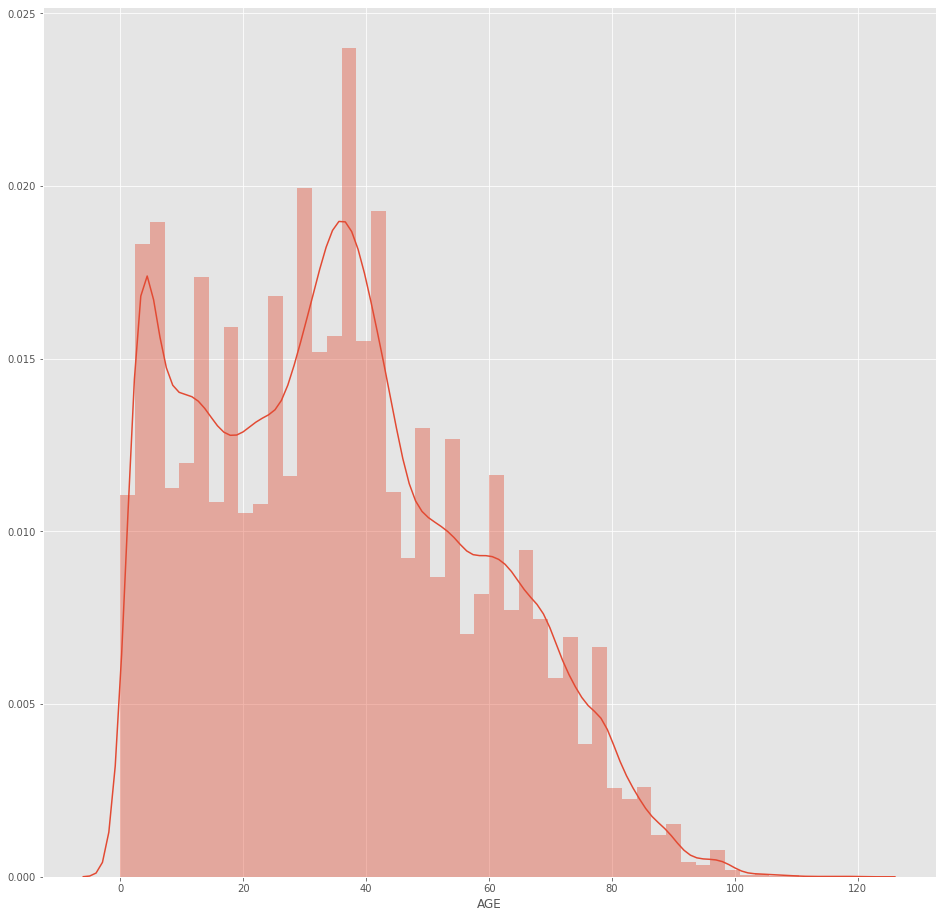

In [12]:
plt.figure(figsize=(16,16))
sns.distplot(df["AGE"])
plt.show()

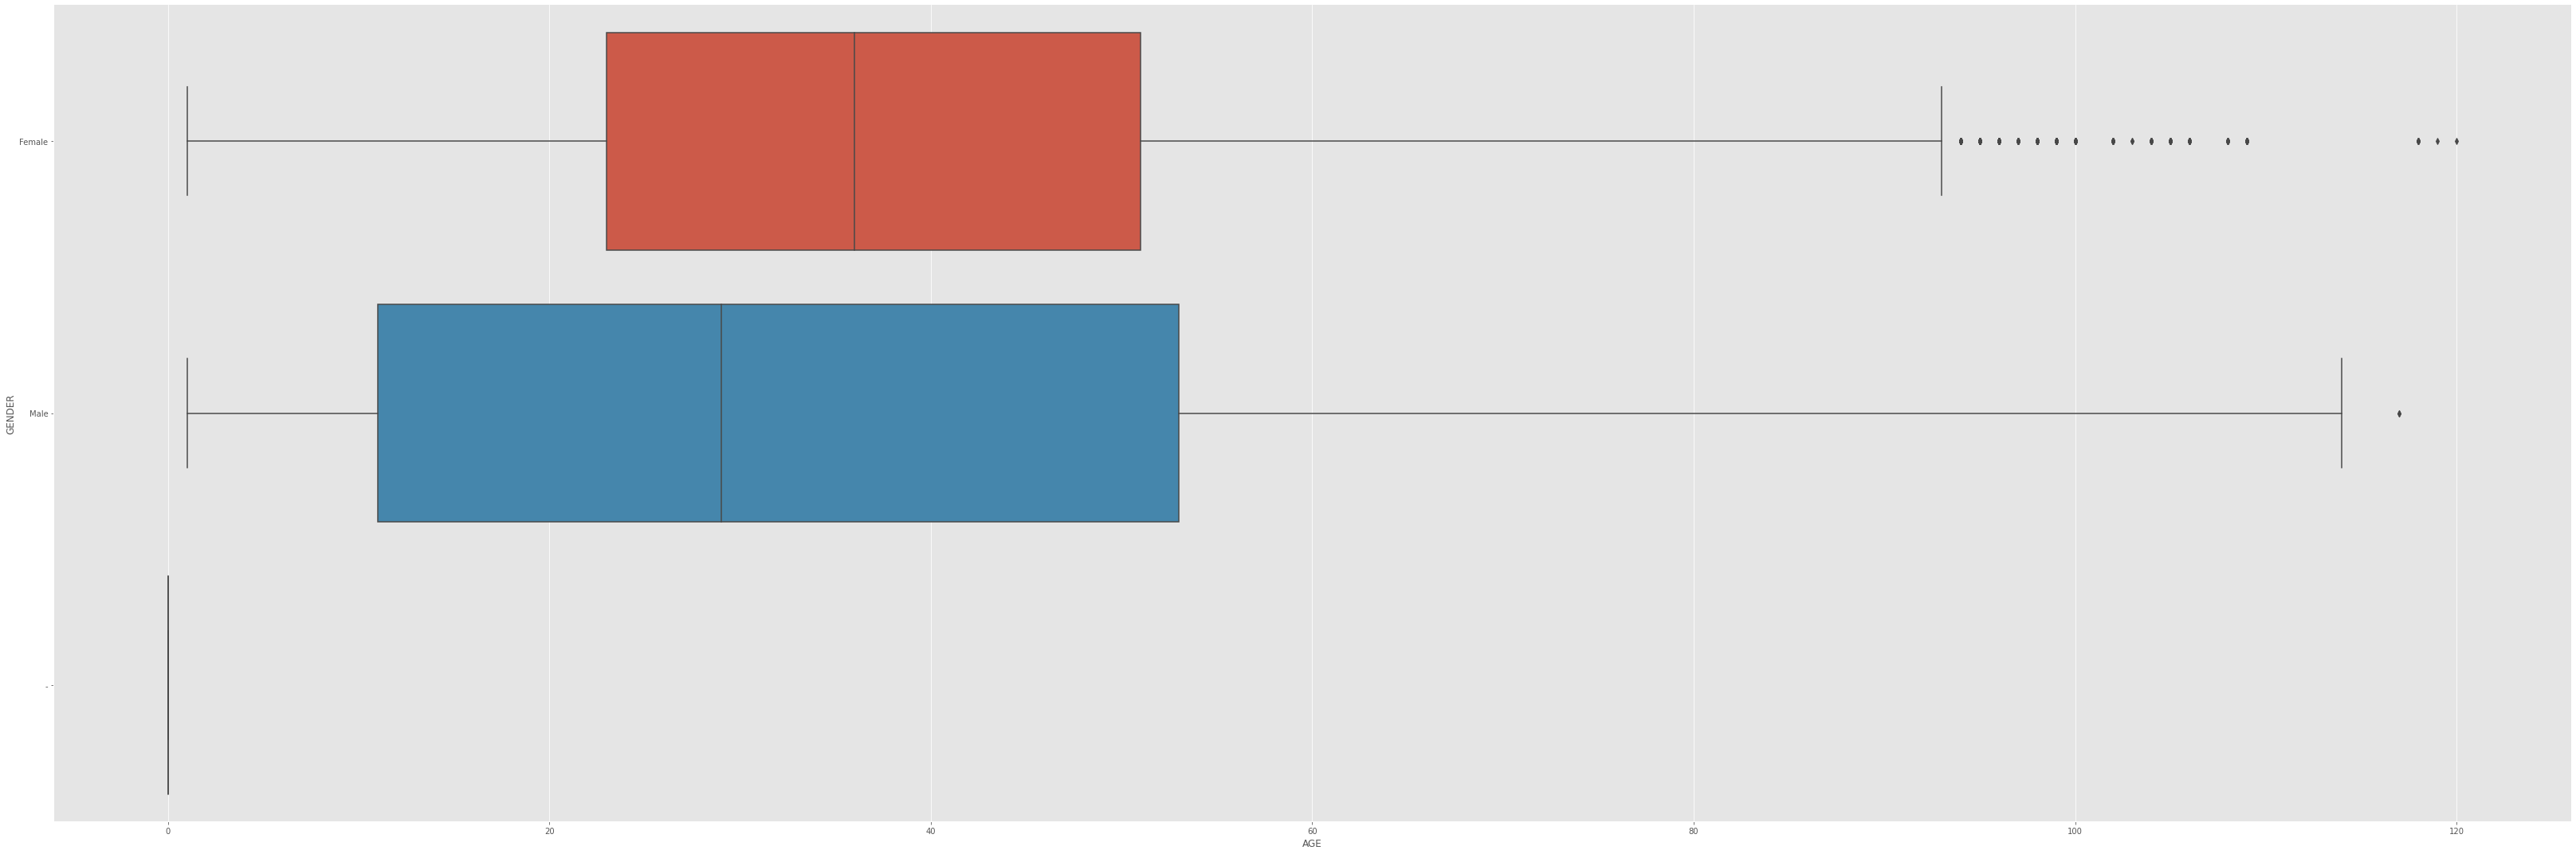

In [13]:
sns.catplot(x="AGE", y="GENDER", kind="box", height=15,aspect=3, data=df)
sns.set_context("paper", font_scale=2) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002184F6EEA88>,
      dtype=object)

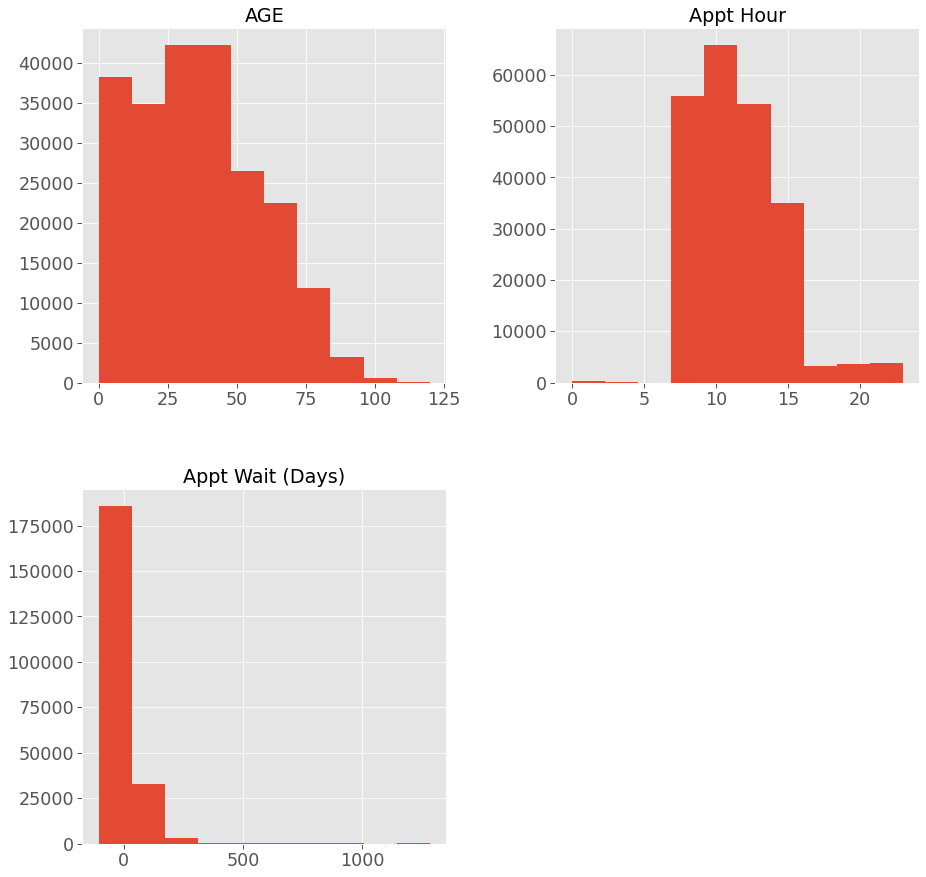

In [14]:
df.hist(figsize=(15,15))

In [15]:
# filling the missing date and time data in distinguishable data 
def fillna_date(df, column):
    df[column] = df[column].fillna(datetime.datetime(2021, 1, 1))
    return df
df = fillna_date(df,  "REG_DT_TM")

In [16]:
# Adding new columns with month and day extracting from the datetime data
def add_date_column(df, cols):
    for i in cols:
        df[i+'_Month'] = pd.DatetimeIndex(df[i]).month
        df[i+'_Day'] = pd.DatetimeIndex(df[i]).day
    df = df.drop(cols, axis = 1)
    return df
df = add_date_column(df, ['APPT_DATE_TIME', 'REG_DT_TM',"BOOKING_DT_TM"])

In [17]:
# dropping duplicates
def dropDuplicates(df):
    df = df.drop_duplicates()
    return df
df = dropDuplicates(df)

In [18]:
# converting the categorical data into numerical data using label encoder
def fill_Encode_data(df):
    df.replace("-","Unknown", inplace = True)
    le = LabelEncoder()
    for i in df.columns:
        if df[i].dtype == "object":
            df[i] = le.fit_transform(df[i].astype(str))
    return df
df= fill_Encode_data(df)

In [ ]:
plt.figure(figsize = (16,16))
sns.pairplot(df)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# fig = ff.create_scatterplotmatrix(df)
# iplot(fig)

In [ ]:
# Removing outliers
def removeOutliers(df):
    z_score=abs(zscore(df))
    df_clean= df.loc[(z_score<3).all(axis=1)]
    return df
df = removeOutliers(df)

In [ ]:
# serperating the target variable
x = df.drop(["No Show"], axis = 1)
y = df["No Show"]

In [ ]:
# removing the skewness using yeo-johnson method
pt = PowerTransformer()
x = pd.DataFrame(pt.fit_transform(x), columns = x.columns)

In [ ]:
names = ['DecisionTreeClassifier', 
         'KNeighborsClassifier', 
         'AdaBoostClassifier',
         'GradientBoostingClassifier',
         'SVC',
         'LogisticRegression']
algo = [DecisionTreeClassifier(), 
        KNeighborsClassifier(), 
        AdaBoostClassifier(),
        GradientBoostingClassifier()
        ,SVC(),
        LogisticRegression()]

models = zip(names,algo)

In [ ]:
# function to find best algorithm
def ModelStats(models, x,y):
    ModelList = []
    accuracy = []
    f1Score = []
    logLoss = []
    crossValidate = []
    for name, model in models:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify= y)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        f1Score.append(f1_score(y_test, y_pred))
        logLoss.append(f1_score(y_test, y_pred))
        ModelList.append(name)
        crossValidate.append(cross_val_score(model,x,y, cv = 5, scoring = "accuracy").mean())
    
    df_model = pd.DataFrame({"accuracy" : accuracy,
                      "f1Score" : f1Score,
                       "logLoss" : logLoss,
                       "crossValidate" : crossValidate
                      }, index = ModelList)
    return df_model

In [ ]:
df_models = ModelStats(models, x,y)
df_models

In [ ]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify= y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy_score:",accuracy_score(y_test, y_pred))
print("f1_score:",f1_score(y_test, y_pred))
print("Log Loss:",log_loss(y_test, y_pred))
print("Cross Validation:",cross_val_score(model,x,y, cv = 5, scoring = "accuracy").mean())

In [ ]:
joblib.dump(model, "model.pkl")

In [ ]:
model = joblib.load("model.pkl")

In [ ]:
model.__dict__